In [1]:
import pandas as pd
import sqlite3

In [17]:
connection = sqlite3.connect('C:/Users/alqai/Downloads/Code _ Data/checkouts.db')

In [18]:
cursor = connection.cursor()

In [41]:
pd.read_sql_query('SELECT * FROM sqlite_master WHERE type = "table"', connection)

,type,name,tbl_name,rootpage,sql
0,table,kz,kz,64992,"CREATE TABLE ""kz"" (\n\t""event_time""\tTEXT,\n\t..."
1,table,checkout,checkout,183424,"CREATE TABLE ""checkout"" (\n\t""event_time""\tTEX..."


In [ ]:
# cursor.execute('SELECT * FROM sqlite_master WHERE type = "table"').fetchmany(10)

In [215]:
# check the table columns, data types
table_info = ('SELECT *, type FROM pragma_table_info("checkout")')

pd.read_sql_query(table_info, connection)

,cid,name,type,notnull,dflt_value,pk,type
0,0,event_time,TEXT,0,None,0,TEXT
1,1,order_id,INTEGER,1,None,0,INTEGER
2,2,product_id,TEXT,0,None,0,TEXT
3,3,category_id,TEXT,0,None,0,TEXT
4,4,category_code,text,0,None,0,text
5,5,brand,text,0,None,0,text
6,6,price,INTEGER,0,None,0,INTEGER
7,7,user_id,INTEGER,0,None,0,INTEGER


In [219]:
#inserting the table into a FataFrame 

df = pd.read_sql_query("SELECT * FROM checkout LIMIT 5000", connection)
df.head(5)

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
0,2020-04-24 11:50:39 UTC,2294359932054536960,1515966223509089906,2.26810542664817e+18,electronics.tablet,samsung,162.01,1.515916e+18
1,2020-04-24 11:50:39 UTC,2294359932054536960,1515966223509089906,2.26810542664817e+18,electronics.tablet,samsung,162.01,1.515916e+18
2,2020-04-24 14:37:43 UTC,2294444024058086144,2273948319057183658,2.268105430163e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
3,2020-04-24 14:37:43 UTC,2294444024058086144,2273948319057183658,2.268105430163e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
4,2020-04-24 19:16:21 UTC,2294584263154074112,2273948316817424439,2.26810547136784e+18,None,karcher,217.57,1.515916e+18


In [37]:
# check the table columns, data types using pandas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   event_time     5000 non-null   object 
 1   order_id       5000 non-null   int64  
 2   product_id     5000 non-null   object 
 3   category_id    4997 non-null   object 
 4   category_code  3946 non-null   object 
 5   brand          4800 non-null   object 
 6   price          4997 non-null   float64
 7   user_id        4997 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 312.6+ KB


In [148]:
#getting the count of orders, min price, max price, sum and average of sales 
cursor.execute('''SELECT COUNT(order_id),MIN(price),
               MAX(price), ROUND(SUM(price)),AVG(price) FROM checkout WHERE price > 0''').fetchall()

[(2201446, 0.02, 50925.9, 339246428.0, 154.1016348843336)]

In [224]:
#getting the count of orders, min price, max price, sum and average of sales in pandas 

g =('''SELECT COUNT(order_id) as number_of_orders,MIN(price) as minmum_price,
               MAX(price) as max_price, ROUND(SUM(price)) as total_sales,
               AVG(price) as average_price FROM checkout WHERE price > 0''')
pd.read_sql_query(g, connection)

,number_of_orders,minmum_price,max_price,total_sales,average_price
0,2201446,0.02,50925.9,339246428.0,154.101635


In [223]:
#Calculating the median price

median = ('''SELECT price as median_price FROM checkout ORDER BY price
LIMIT 1 OFFSET(SELECT COUNT(*) FROM checkout) / 2 ''')

pd.read_sql_query(median, connection)

,median_price
0,34.7


In [211]:
#the item with the highst price 
highst_item = ('''SELECT * 
FROM checkout
WHERE price = (SELECT max(price) FROM checkout)''')

highst_item_df = pd.read_sql_query(highst_item, connection)
highst_item_df.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
0,2020-05-26 08:12:38 UTC,2353234364520727552,1515966223509105016,2.37449891400059e+18,electronics.video.tv,samsung,50925.9,None


In [213]:
#the item with the min price
lowest_item = ('''SELECT * 
FROM checkout
WHERE price = (SELECT min(price) FROM checkout WHERE price >0)''')

lowest_item_df = pd.read_sql_query(lowest_item, connection)
lowest_item_df.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
0,2020-04-29 03:25:12 UTC,2297729407910937600,1515966223509105105,2.26810542752897e+18,None,sbs,0.02,1.515916e+18
1,2020-04-29 03:25:12 UTC,2297729407910937600,1515966223509105105,2.26810542752897e+18,None,sbs,0.02,1.515916e+18
2,2020-05-01 05:03:49 UTC,2299228597979709440,1515966223509262429,2.26810542726054e+18,None,ava,0.02,1.515916e+18
3,2020-05-01 08:08:36 UTC,2299321605823660800,1515966223509262429,2.26810542726054e+18,None,ava,0.02,1.515916e+18
4,2020-05-01 11:45:13 UTC,2299430630892503552,1515966223509616615,2.26810542726054e+18,None,ava,0.02,1.515916e+18


In [159]:
# how many distinct users
cursor.execute('''SELECT COUNT(DISTINCT user_id) FROM checkout where user_id != "None"''').fetchall()

[(98262,)]

In [ ]:
# number of repeated customers
cursor.execute('''SELECT COUNT()''')

In [206]:
#finding the count of orders per category
order_per_category = ('''SELECT category_code, COUNT(category_id)
FROM checkout GROUP BY category_code
ORDER BY COUNT(category_id) DESC''')

order_per_category_df = pd.read_sql_query(order_per_category, connection)
order_per_category_df.head()

,category_code,COUNT(category_id)
0,None,612202
1,electronics.smartphone,357682
2,appliances.kitchen.refrigerators,77386
3,electronics.video.tv,71711
4,computers.notebook,71436


In [208]:
#finding where the top sales comes from which brand 
brand_sales = ('''SELECT brand, COUNT(brand), ROUND(SUM(price)) as total_price
FROM checkout 
WHERE brand NOT LIKE '%[0-9]%' AND price > 0
GROUP BY brand 
ORDER BY COUNT(brand) DESC''')

brand_sales_df = pd.read_sql_query(brand_sales, connection)
brand_sales_df.head()

,brand,COUNT(brand),total_price
0,samsung,358925,90052822.0
1,ava,118161,8542529.0
2,tefal,78653,6454978.0
3,apple,74709,47914786.0
4,huawei,57437,10773965.0


In [165]:
#Insert the table into pandas dataframe and plot the result

by_brand = ('''SELECT brand, COUNT(brand) as items_per_brand, ROUND(SUM(price)) as brand_sales
FROM checkout 
WHERE brand NOT LIKE '%[0-9]%' AND price > 0
GROUP BY brand 
ORDER BY COUNT(brand) DESC''')

df = pd.read_sql(by_brand, connection)
df.head()

,brand,items_per_brand,brand_sales
0,samsung,358925,90052822.0
1,ava,118161,8542529.0
2,tefal,78653,6454978.0
3,apple,74709,47914786.0
4,huawei,57437,10773965.0


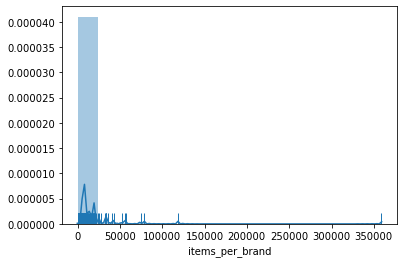

In [178]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#plot items_sold per brand to see the distribution

sns.distplot(df['items_per_brand'], bins = 15, rug = True )

# the number of items sold per brand is skewed to the right since mos of brands are concentrated
#around 0

C:\Users\alqai\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


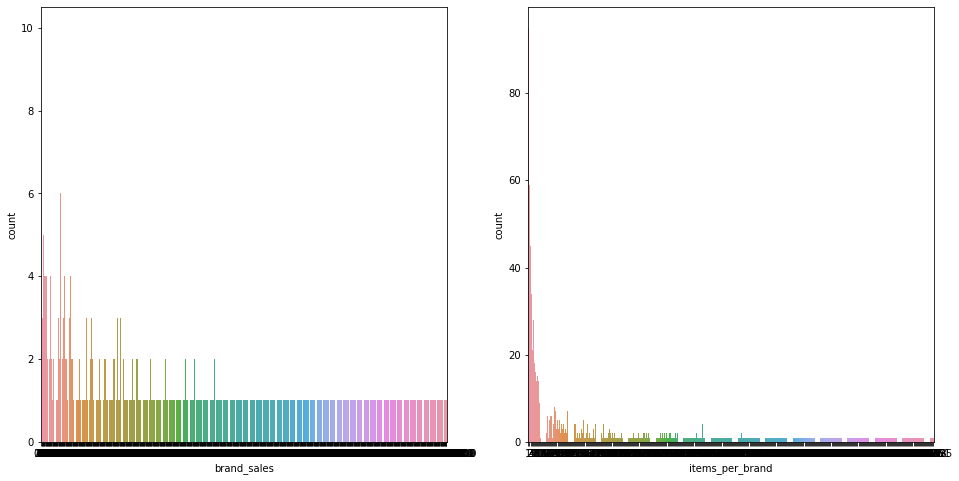

In [183]:
#plot items_sold per brand to see the distribution


fig, ax =plt.subplots(1,2, figsize=(16,8))
sns.countplot(df['brand_sales'], ax=ax[0])
sns.countplot(df['items_per_brand'], ax=ax[1])
fig.show()

In [201]:
# min category ordered from category_code # tried where  category_code != 'int' and it gave me None
min_category = ('''SELECT min(mincount), category_code
FROM (SELECT category_code, COUNT(category_code) AS mincount FROM checkout GROUP BY category_code) 
where  category_code = 'apparel.shoes'
''')

min_category_df = pd.read_sql_query(min_category, connection)
min_category_df.head()

,min(mincount),category_code
0,2,apparel.shoes


In [203]:
# max category ordered from category_code
max_category= ('''SELECT MAX(maxcount), category_code
FROM (SELECT category_code, COUNT(category_code) AS maxcount FROM checkout GROUP BY category_code) 
''')

max_category_df = pd.read_sql_query(max_category, connection)
max_category_df.head()

,MAX(maxcount),category_code
0,357682,electronics.smartphone


In [110]:
#check if there is any returns by see if there is any values < 0
cursor.execute('''SELECT SUM(price) FROM checkout WHERE price <0''').fetchall()

[(None,)]

In [198]:
#calculate total orders per brand 
per_brand = ('''SELECT brand,count(order_id) as number_of_orders,
category_code, SUM(price) as sales
FROM checkout
group by brand, category_code
HAVING sales >1 AND brand !='None'
ORDER by sales DESC''')

per_brand_df = pd.read_sql_query(per_brand, connection)
per_brand_df.head()

,brand,number_of_orders,category_code,sales
0,samsung,178903,electronics.smartphone,4.498434e+07
1,apple,46030,electronics.smartphone,3.535255e+07
2,samsung,22698,electronics.video.tv,1.267467e+07
3,lg,19234,electronics.video.tv,1.049990e+07
4,lenovo,17886,computers.notebook,1.025737e+07


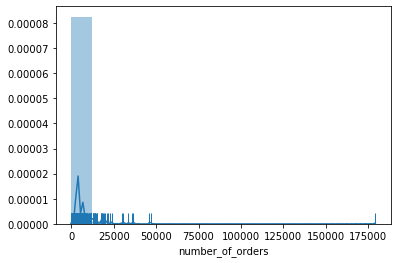

In [218]:
#plot order distribution per brand
sns.distplot(per_brand_df['number_of_orders'], bins = 15, rug = True )

In [ ]:
('''SELECT brand, sum(price)as price_cat
FROM checkout
GROUP BY brand
HAVING price_cat < 10''')